<h3> MultiLayer perceptron (MLP)</h3>

In this practical we will implement a 2 layer perceptron following the tutorial from [James Loy, Author of Neural Network Projects with Python](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6) to solve the XOR problem. You can find the github repository with the code [here](https://github.com/robmarkcole/Useful-python/blob/master/Numpy/Build%20a%20neural%20network.ipynb).

We will create a class to represent our model and we will store the weights and biases as attributes. Additionally, our class will have methods to compute the forward and back propagation.

To start, we need a couple of helper functions such as the sigmoid function and the loss function that we will define outside of the class.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

**Exercise 1** - Define a function called `sigmoid` where you compute the sigmoid function $\sigma(x)=\frac{1}{1+e^{-x}}$ and another function called `mean_squared_error` where you compute the mean squared error: $MSE=\frac{1}{n}\sum_{i=0}^n(y_i-\hat{y}_i)^2$

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred)**2)

**Exercise 2** - Create a class called NeuralNetwork. Your `init` should have no arguments but on it you should define 6 attributes: `weights_1`, a 2x2 matrix representing the connections from a 2 neuron input layer to a 2 neuron hidden layer; `bias_1`, a 2x1 vector representing the bias of the two neurons in the hidden layer; `weights_2`, a 2x1 matrix that represents the two connections from the hidden layer to the output; and `bias_2`, a 1x1 vector that represents the bias of the single neuron output layer. The last two attributes, `loss_per_epoch` and `epochs` will be used to monitor the training process of the neural network.

**Exercise 3** - Fill the `forward`, `compute_gradients` & `train` methods. The forward computation is defined by

\begin{equation}
\hat{y} = \sigma(W_2^T(\sigma(W_1^TX+b_1))+b_2),
\end{equation}

where $W_1$ is the previously defined attribute `weights_1`, $b_1$ is `bias_1`, $W_2$ is `weights_2`, $b_2$ is `bias_2` and $\sigma$ is the sigmoid function.

The `compute_gradients` method should return 4 values, which are the partial derivatives of the loss function with respect to the parameters of the model represented by the attribute matrices. Compute the gradient $\nabla L$ in four steps:

\begin{equation}
\frac{\partial L}{\partial W_2} = -2[(y - \hat{y})\hat{y}(1 - \hat{y})]X_0^T
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b_2} = -2(y - \hat{y})·\hat{y}(1 - \hat{y})
\end{equation}

\begin{equation}
\frac{\partial L}{\partial W_1} = -2(y - \hat{y})·\hat{y}(1 - \hat{y})·W_2X^T\odot(X_0(1-X_0))
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b_1} = -2(y - \hat{y})·\hat{y}(1 - \hat{y})·W_2\odot(X_0(1-X_0))
\end{equation}

where $X_0=\sigma(W_1^TX+b_1)$ is the output of the first layer and $\odot$ is the Hadamard (element-wise) product.

Finally, the `train` method should use the input data to calculate the gradients and update the parameters of the model. In addition to `X` and `y`, it has two more arguments: the number of epochs and the learning rate. You should add the number of epochs to the value stored in the attribute `epochs`, and at each training step you shoud add the current loss to the attribute `loss_per_epoch`.

In [179]:
class NeuralNetwork:
    def __init__(self):
        self.weights_1 = np.random.random((2,2))
        self.bias_1 = np.random.random((2,1))
        self.weights_2 = np.random.random((2,1))
        self.bias_2 = np.random.rand(1)
        self.loss_per_epoch = []
        self.epochs = 0

    def forward(self, X):
        layer_1_output = sigmoid(np.dot(self.weights_1.T, X.T) + self.bias_1)
        output = sigmoid(np.dot(self.weights_2.T, layer_1_output) + self.bias_2)
        return output

    def update_weights(self, X, y, learning_rate):
        layer_1_output = sigmoid(np.dot(self.weights_1.T, X.T) + self.bias_1)
        output = sigmoid(np.dot(self.weights_2.T, layer_1_output) + self.bias_2)
        grad_2 = -2 * (y - output) * output * (1 - output)
        self.bias_2 -= np.mean(grad_2) * learning_rate
        self.weights_2 -= np.dot(layer_1_output, grad_2.T) * learning_rate
        grad_1 = grad_2 * self.weights_2 * layer_1_output * (1 - layer_1_output)
        self.bias_1 -= np.mean(grad_1, axis=1).reshape(-1,1) * learning_rate
        self.weights_1 -= np.dot(X.T, grad_1.T)
    
    def train(self, X, y, epochs, learning_rate = 0.01):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.loss_per_epoch.append(mean_squared_error(y, y_pred))
            self.update_weights(X, y, learning_rate)
        self.epochs += epochs
    
    def plot_loss(self):
        plt.plot(self.loss_per_epoch)
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel('Loss (MSE)', fontsize=14)

We are just missing the training data, which in this case is simply given by the XOR table:

| Input 1 | Input 2 | Output |
| :-------: | :-------: | :------: |
|    0    |    0    |    0   |
|    0    |    1    |    1   |
|    1    |    0    |    1   |
|    1    |    1    |    0   |

**Exercise 4** - Train the model for 2500 epochs and learning rate 1 with the given data and plot the loss per epoch.

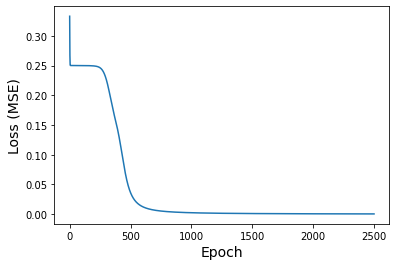

In [183]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0])

epochs = 2500
learning_rate = 1

model = NeuralNetwork()
model.train(X, y, epochs, learning_rate)
model.plot_loss()

**Exercise 5** - Print the final raw predictions (without rounding) and compare them to the values on the table.

In [184]:
y_pred = model.forward(X)
print('inputs:', X)
print('outputs:', y_pred)

inputs: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
outputs: [[0.02964376 0.98074647 0.98073791 0.02117799]]
